In [0]:
import json 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def load(path):
    with open(path) as json_file:
        return json.load(json_file)

def get_map(metrics, testset):
        if testset:
            res = [m['map'] for qid, m in metrics.items() if not int(qid) in range(76,101)]
            if not len(res)==124: 
                print("SOMETHING IS WRONG")
            return np.average(res)
        return  np.average([m['map'] for m in metrics.values()])


# DOC2VEC Plots

In [0]:
# Insert path to result files 
PATH = './drive/My Drive/doc2vec/doc2vec_results/'

# DOC2VEC BEST PARAMETERS: 25000_200_20
best_w = 20
best_ves = 200
best_mvs = 25000

def get_json_path(w, ves, mvs):
    return PATH+f'doc2vec_E2_W{w}_VES{ves}_MAXVOS{mvs}_all.json'

def read_grid_search_results(best_w=None, best_ves=None, best_mvs=None, testset=False):

    MAP = []

    if best_w == None:
        assert best_ves and best_mvs

        for w in [5, 10, 15, 20]:
            
            metrics = load(get_json_path(w=w, ves=best_ves, mvs=best_mvs))
            MAP.append(get_map(metrics, testset))
    

    elif best_ves == None:
        assert best_w and best_mvs

        for ves in [200, 300, 400, 500]:

            metrics = load(get_json_path(w=best_w, ves=ves, mvs=best_mvs))
            MAP.append(get_map(metrics, testset))

    elif best_mvs == None:
        assert best_w and best_ves

        for mvs in [10000, 25000, 50000, 100000, 200000]:
            metrics = load(get_json_path(w   =  best_w, 
                                         ves =  best_ves, 
                                         mvs =  mvs))
            MAP.append(get_map(metrics, testset))

    return MAP

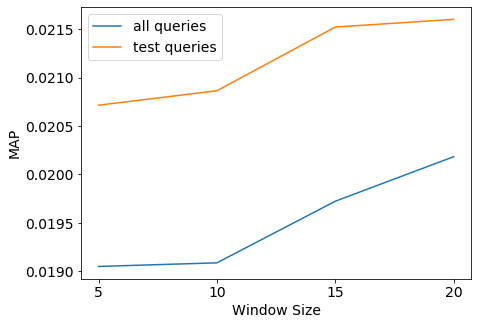

In [236]:
# OVER WINDOW SIZE

x = np.arange(1,5)

MAP =  read_grid_search_results(best_ves=best_ves, 
                                best_mvs=best_mvs, 
                                best_w=None,
                                testset=False)

MAPt = read_grid_search_results(best_ves=best_ves, 
                                best_mvs=best_mvs, 
                                best_w=None,
                                testset=True)


plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 14})
plt.plot(x, MAP)
plt.plot(x, MAPt)
plt.ylabel('MAP')
plt.xlabel('Window Size')
plt.xticks(x,[5, 10, 15, 20])
plt.legend(('all queries', 'test queries'),
           loc='upper left')
plt.savefig('d2v_window_size')

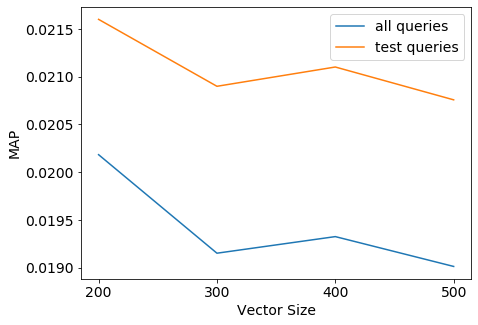

In [237]:
# OVER VECTOR SIZE

x = np.arange(1,5)

MAP =  read_grid_search_results(best_ves=None, 
                                best_mvs=best_mvs, 
                                best_w=best_w,
                                testset=False)

MAPt = read_grid_search_results(best_ves=None, 
                                best_mvs=best_mvs, 
                                best_w=best_w,
                                testset=True)

plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 14})
plt.plot(x, MAP)
plt.plot(x, MAPt)
plt.ylabel('MAP')
plt.xlabel('Vector Size')
plt.xticks(x,[200,300, 400, 500])
plt.legend(('all queries', 'test queries'),
           loc='upper right')
plt.savefig('d2v_vector_size')

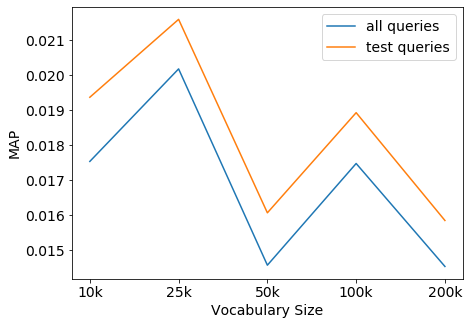

In [238]:
# OVER MAx VOCAB SIZE SIZE
x = np.arange(1,6)

MAP =  read_grid_search_results(best_ves=best_ves, 
                                best_mvs=None, 
                                best_w=best_w,
                                testset=False)

MAPt = read_grid_search_results(best_ves=best_ves, 
                                best_mvs=None, 
                                best_w=best_w,
                                testset=True)
plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 14})
plt.plot(x,MAP)
plt.plot(x, MAPt)
plt.ylabel('MAP')
plt.xlabel('Vocabulary Size')
plt.xticks(x,['10k','25k', '50k', '100k', '200k'])
plt.legend(('all queries', 'test queries'),
           loc='upper right')
plt.savefig('d2v_vocab_size')


# LSI-BOW & LSI-TFIDF PLOTS


In [0]:
# Insert path to result files 
PATH = './drive/My Drive/LSI_and_LDA/tuning_results_json/'
T = [10, 50, 100, 500, 1000, 2000]

def get_json_path(name, topic_size):
    return PATH+f'LSI_{name}_{topic_size}'

def read_LSI_results(name,testset=False):
    MAP = []

    for topic_size in T:
        metrics = load(get_json_path(name, topic_size))
        MAP.append(get_map(metrics, testset))


    return MAP
    


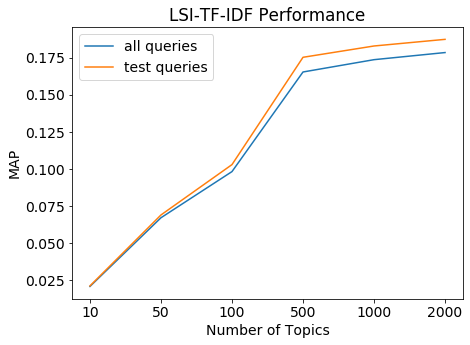

In [250]:
x = np.arange(1,7)

MAP =  read_LSI_results('tfidf')
MAPt = read_LSI_results('tfidf', testset=True)

plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 14})
plt.plot(x,MAP)
plt.plot(x, MAPt)
plt.title('LSI-TF-IDF Performance')
plt.ylabel('MAP')
plt.xlabel('Number of Topics')
plt.xticks(x,T)
plt.legend(('all queries', 'test queries'),
           loc='upper left')
plt.savefig('lsi_tfidf')


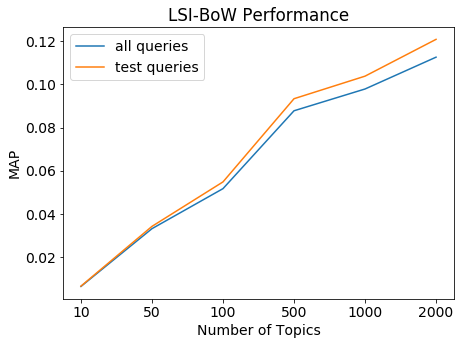

In [251]:
#' LSI BOW'
x = np.arange(1,7)

MAP =  read_LSI_results('bow')
MAPt = read_LSI_results('bow', testset=True)

plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 14})
plt.plot(x,MAP)
plt.plot(x, MAPt)
plt.title('LSI-BoW Performance')
plt.ylabel('MAP')
plt.xlabel('Number of Topics')
plt.xticks(x,T)
plt.legend(('all queries', 'test queries'),
           loc='upper left')
plt.savefig('lsi_bow')

124